In [1]:
import os.path
from itertools import count

from tensorboard.plugins.image.summary import image

from utils import set_all_seeds
from data_anaylsis.neuron_coverage import model_neuron_coverage
from population import load_mnist_test
from config import POPSIZE
from predictor import Predictor
from glob import glob
import os
import numpy as np

pop_size = POPSIZE
model = Predictor.model

2024-12-02 22:50:46.532377: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 22:50:46.589052: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-02 22:50:47.387800: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


/home/xchen/Projects/XMutant/XMutant-MNIST


/home/xchen/miniconda3/envs/xmutant-backup/lib/python3.8/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Loaded model from disk


2024-12-02 22:50:51.146646: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-02 22:50:51.184761: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-02 22:50:51.185061: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [19]:


for digit in range(10): # range(10):
    set_all_seeds(digit)
    x_test, y_test = load_mnist_test(pop_size, digit)
    coverage = model_neuron_coverage(model, x_test, threshold=10)
    print(f"Digit {digit} Original Test Set Model Neuron Coverage: {coverage:.2f}")


7/7 [==============================] - 0s 18ms/step
Digit 0 Original Test Set Model Neuron Coverage: 0.22
7/7 [==============================] - 0s 1ms/step
Digit 1 Original Test Set Model Neuron Coverage: 0.21
7/7 [==============================] - 0s 1ms/step
Digit 2 Original Test Set Model Neuron Coverage: 0.21
7/7 [==============================] - 0s 1ms/step
Digit 3 Original Test Set Model Neuron Coverage: 0.21
7/7 [==============================] - 0s 1ms/step
Digit 4 Original Test Set Model Neuron Coverage: 0.21
7/7 [==============================] - 0s 1ms/step
Digit 5 Original Test Set Model Neuron Coverage: 0.21
7/7 [==============================] - 0s 1ms/step
Digit 6 Original Test Set Model Neuron Coverage: 0.21
7/7 [==============================] - 0s 1ms/step
Digit 7 Original Test Set Model Neuron Coverage: 0.20
7/7 [==============================] - 0s 1ms/step
Digit 8 Original Test Set Model Neuron Coverage: 0.22
7/7 [==============================] - 0s 1ms/step
Dig

In [20]:
x_test.shape

(200, 28, 28)

In [21]:
baseline_path = "./result/digits/_R_R"
print(os.getcwd())
assert os.path.exists("./result/digits/_R_R/digit_0_id_0.npy")
for digit in range(10): # range(10):
    set_all_seeds(digit)
    x_test, y_test = load_mnist_test(pop_size, digit)
    generated_x = glob(baseline_path + "/digit_" + str(digit) + "_*.npy")
    print(f"number of generated {digit} is {len(generated_x)}")
    # merge x_test and generated_x
    for gen_x in generated_x:
        x_test = np.concatenate((x_test, np.load(generated_x[0]).squeeze(-1)))
    print("x_test extended number", x_test.shape[0])
    coverage = model_neuron_coverage(model, x_test, threshold=0.2)
    print(f"Digit {digit} Original Test Set Model Neuron Coverage: {coverage:.2f}")
    
    
    

/home/xchen/Projects/XMutant/XMutant-MNIST
number of generated 0 is 152
x_test extended number 352
11/11 [==============================] - 0s 1ms/step
Digit 0 Original Test Set Model Neuron Coverage: 0.24
number of generated 1 is 184
x_test extended number 384
12/12 [==============================] - 0s 1ms/step
Digit 1 Original Test Set Model Neuron Coverage: 0.17
number of generated 2 is 96
x_test extended number 296
10/10 [==============================] - 0s 987us/step
Digit 2 Original Test Set Model Neuron Coverage: 0.24
number of generated 3 is 114
x_test extended number 314
10/10 [==============================] - 0s 8ms/step
Digit 3 Original Test Set Model Neuron Coverage: 0.22
number of generated 4 is 128
x_test extended number 328
11/11 [==============================] - 0s 991us/step
Digit 4 Original Test Set Model Neuron Coverage: 0.22
number of generated 5 is 101
x_test extended number 301
10/10 [==============================] - 0s 7ms/step
Digit 5 Original Test Set Mode

In [22]:
baseline_path = "./result/digits/_C_C_sm"
print(os.getcwd())

for digit in range(10): # range(10):
    set_all_seeds(digit)
    x_test, y_test = load_mnist_test(pop_size, digit)
    generated_x = glob(baseline_path + "/digit_" + str(digit) + "_*.npy")
    print(f"number of generated {digit} is {len(generated_x)}")
    # merge x_test and generated_x
    for gen_x in generated_x:
        x_test = np.concatenate((x_test, np.load(generated_x[0]).squeeze(-1)))
    print("x_test extended number", x_test.shape[0])
    coverage = model_neuron_coverage(model, x_test, threshold=0.1)
    print(f"Digit {digit} Original Test Set Model Neuron Coverage: {coverage:.2f}")

/home/xchen/Projects/XMutant/XMutant-MNIST


KeyboardInterrupt: 

DLfuzz

In [2]:
from PIL import Image
import os
from tqdm import tqdm

from tensorflow.keras.layers import Input, Activation
from tensorflow.keras import backend as K

from adversarial_methods.DLFuzz.dlfuzz import DLFuzz
from adversarial_methods.DLFuzz.utils import clear_up_dir, load_image, deprocess_image, get_signature


In [7]:
model = Predictor.model
digit = 0 # range(10):
set_all_seeds(digit)
x_test, y_test = load_mnist_test(pop_size, digit)
save_dir = './result/dlfuzz/digit_' + str(digit)
clear_up_dir(save_dir)

# prepare
K.set_learning_phase(False)

dlfuzz = DLFuzz(model)
    # for x_ in x_test:
    #     # calculate fuzz image
    #     gen_img = dlfuzz.generate_fuzzy_image(x_)
    # 
    #     # save image
    #     # mannual_label = int(img_name.split('_')[1])
    #     gen_img_deprocessed = deprocess_image(gen_img.numpy())
    #     img_name = img_paths[i].split('.')[0]
    #     save_img = save_dir + img_name + '_' + str(get_signature()) + '.png'
    #     Image.fromarray(gen_img_deprocessed).save(save_img)

In [8]:
gen_img = dlfuzz.generate_adversarial_image(x_test[0])

ValueError: Exception encountered when calling layer 'sequential' (type Sequential).

Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (1, 28, 28)

Call arguments received by layer 'sequential' (type Sequential):
  • inputs=<tf.Variable 'Variable:0' shape=(1, 28, 28) dtype=float32, numpy=
array([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,  17.,  66., 138., 255., 253., 169., 138.,  23.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           5., 120., 228., 252., 252., 253., 252., 252., 252., 158.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         108., 252., 252., 252., 252., 190., 252., 252., 252., 252.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  43.,
         233., 252., 252., 252., 116.,   5., 135., 252., 252., 252.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  43., 178.,
         253., 252., 221.,  43.,   2.,   0.,   5.,  54., 232., 252.,
         210.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  93., 253.,
         255., 249., 115.,   0.,   0.,   0.,   0.,   0., 136., 251.,
         255., 154.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 166., 252.,
         253., 185.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 209.,
         253., 206.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  19., 220., 252.,
         253.,  92.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.,
         253., 206.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  70., 252., 252.,
         192.,  17.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.,
         253., 223.,  25.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0., 122., 252., 252.,
          63.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.,
         253., 252.,  69.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0., 132., 253., 253.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.,
         255., 253.,  69.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0., 184., 252., 252.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.,
         253., 252.,  69.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0., 184., 252., 252.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.,
         253., 240.,  50.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0., 184., 252., 252.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 210.,
         253., 112.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  48., 232., 252.,
         158.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 230.,
         232.,   8.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  93., 253.,
         244.,  50.,   0.,   0.,   0.,   0.,   0.,   0., 155., 253.,
         168.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  34., 164.,
         253., 113.,   0.,   0.,   0.,   0.,   0.,  66., 236., 231.,
          42.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  32.,
         222., 240., 134.,   0.,   0.,  38.,  91., 234., 252., 137.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          25., 177., 240., 207., 103., 233., 252., 252., 176.,  35.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,  15.,  54., 179., 252., 137., 137.,  54.,   4.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]], dtype=float32)>
  • training=False
  • mask=None

In [68]:
from adversarial_methods.fgsm import *

digit = 0 # range(10):
x_test, y_test = load_mnist_test(pop_size, digit)
image = x_test[0]
count = 0
for i, (image,image_label) in enumerate(zip(x_test, y_test)):
    image = np.reshape(image, model.input_shape[1:])
    x = np.array([image])
    y = np.zeros((1,10))
    y[image_label] = 1
    g = gradient_of_x(x, y, model)
    g_npy = np.squeeze(g.numpy())
    g_sign = np.reshape(tf.sign(g_npy), model.input_shape[1:])
    
    epsilons = [1]# = np.linspace(0, 1, num=20)
    
    for eps in epsilons:
      adv_x = image + eps*g_sign
      adv_x = tf.clip_by_value(adv_x, -1, 1)
      prediction, confidence = Predictor.predict_single(np.expand_dims(adv_x, 0), image_label) 
      if prediction!= image_label:
          count += 1
          print(f"id {i} count {count} eps {eps} misclass, label {image_label}, predict {prediction, confidence}")
          break
       

1/1 [==============================] - 0s 13ms/step
id 5 count 1 eps 1 misclass, label 0, predict (8, -0.9996769)
1/1 [==============================] - 0s 13ms/step
id 14 count 2 eps 1 misclass, label 0, predict (5, -0.93511987)
1/1 [==============================] - 0s 13ms/step
id 17 count 3 eps 1 misclass, label 0, predict (2, -0.26762453)
1/1 [==============================] - 0s 13ms/step
id 29 count 4 eps 1 misclass, label 0, predict (2, -0.9981566)
1/1 [==============================] - 0s 18ms/step
id 40 count 5 eps 1 misclass, label 0, predict (2, -0.7474635)
1/1 [==============================] - 0s 14ms/step
id 43 count 6 eps 1 misclass, label 0, predict (2, -0.5200295)
1/1 [==============================] - 0s 13ms/step
id 48 count 7 eps 1 misclass, label 0, predict (2, -0.99999714)
1/1 [==============================] - 0s 13ms/step
id 51 count 8 eps 1 misclass, label 0, predict (2, -0.96827954)
1/1 [==============================] - 0s 13ms/step
id 59 count 9 eps 1 miscl

In [69]:
print(f"id {i} count {count}" )

id 199 count 35


In [32]:
Predictor.predict_single(np.expand_dims(image, 0), image_label) 

1/1 [==============================] - 0s 20ms/step


(0, 1.0)

In [35]:
g_sign.shape

(28, 28, 1)

In [52]:
def generate_adversarial_image(self, image, image_label, step=0.5):
    



1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


Text(0.5, 1.0, 'Adversarial Image (0, 0.9999991)')

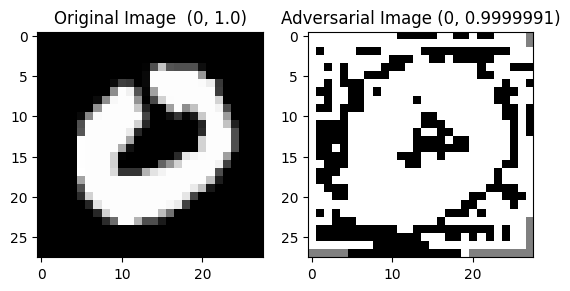

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f'Original Image  {Predictor.predict_single(np.expand_dims(image, 0), image_label)}')
plt.subplot(1, 2, 2)
plt.imshow(adv_x, cmap='gray')
plt.title(f'Adversarial Image {Predictor.predict_single(np.expand_dims(adv_x, 0), image_label)}')


array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
        -1., -1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,
         1.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  0.],
       [ 1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,
         1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
         1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
         1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
         1.,  1.],
       [ 1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,
         1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,
        -1., -1.],
       [ 1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,
        -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,
         1.,  1.],
       [ 1

In [ ]:
image = np.reshape(image, model.input_shape[1:])
x = np.array([image])
y = np.array([image_label])
g = gradient_of_x(x, y, self.model)
g_npy = np.squeeze(g.numpy())
g_sign = np.reshape(tf.sign(g_npy), self.model.input_shape[1:])

image_adv = np.copy(image)  # _lava means latent variants
image_adv += step * g_sign